# Predicting Maize Acreage Sales
At One Acre Fund, $ impact for our customers - smallholder famers - is our topline business objective. In most of our countries of operations, over 80% of customer impact comes from the maize seed and fertilizer packages we sell. However, maize acreage sales fluctuates each year, and we've struggled to provide tailored support to our sales agents seeking to increase maize acreage sales YoY. 

This analysis explores trends in maize acreage adoption over 5 years, seeking to identify;
- Is it possible to predict future season maize acreage sales - at the customer level - using previous season purchases?
- Are there segments of customers that we should be targeting which are more easily "upsold" during enrollment to increase maize acreage?


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Data Prep
Loading all the relevant roster data files, but narrowing in on the likely features of relevance (to cut down on total size). 

In [13]:
# 2016
roster_2016 = pd.read_csv("/Volumes/GoogleDrive/My Drive/ml_projects/roster_maize/roster_2016.csv")

roster_2016_to_include = ['RegionName', 'DistrictName', 'SectorName', 'FieldManager', 'SiteName', 'FieldOfficer', 'GroupName', 'LastName', 'FirstName', 'OAFID', 'NationalID', 'NewMember', 'TotalEnrolledSeasons', 'TotalCredit',
                         'TotalRepaid', 'RemainingCredit', '% Repaid', 'Dropped', 'Deceased', 'ClientPhone', 'AccountNumber', 'GlobalClientID', '2016, Long Rain_Actellic Super qty', '2016, Long Rain_AI Ayrshire qty', '2016, Long Rain_AI Fleckvieh qty',
                         '2016, Long Rain_AI Jersey qty', '2016, Long Rain_Bean Intercrop acres' , '2016, Long Rain_Bean Intercrop Disease Prevention acres', '2016, Long Rain_BioLite HomeStove qty', '2016, Long Rain_Chick Delivery qty', '2016, Long Rain_Chicken Health qty', 
                         '2016, Long Rain_Chujio Water Filter qty', '2016, Long Rain_Compost Booster qty', '2016, Long Rain_Dairy Meal qty', '2016, Long Rain_Envirofit Cookstove qty', '2016, Long Rain_Extra CAN for Maize acres', '2016, Long Rain_Farmate Sprayer 10L qty',
                         '2016, Long Rain_Harvest Drying Sheet qty', '2016, Long Rain_Large Maize acres', '2016, Long Rain_Milk Booster qty', '2016, Long Rain_PICS Bag qty', '2016, Long Rain_Red Onions qty', '2016, Long Rain_So Sure Reusable Pads qty', '2016, Long Rain_Sorghum acres', 
                         '2016, Long Rain_Soybean Intercrop acres', '2016, Long Rain_Storage Bag qty', '2016, Long Rain_Sun King Home qty', '2016, Long Rain_Sun King Mobile qty', '2016, Long Rain_Sun King Pro II qty', '2016, Long Rain_Sun King Solo qty', '2016, Long Rain_Small Maize acres']

roster_2016_new = roster_2016[roster_2016_to_include].copy()

del roster_2016

#2017
roster_2017 = pd.read_csv("/Volumes/GoogleDrive/My Drive/ml_projects/roster_maize/roster_2017.csv")

roster_2017_to_include = ['RegionName', 'DistrictName', 'SectorName', 'FieldManager', 'SiteName', 'FieldOfficer', 'GroupName', 'LastName', 'FirstName', 'OAFID', 'NationalID', 'NewMember', 'TotalEnrolledSeasons', 'TotalCredit',
                         'TotalRepaid', 'RemainingCredit', '% Repaid', 'Dropped', 'Deceased', 'ClientPhone', 'AccountNumber', 'GlobalClientID', '2017, Long Rain_Actellic Super qty', '2017, Long Rain_AI Ayrshire qty', '2017, Long Rain_AI Fleckvieh qty', '2017, Long Rain_AI Jersey qty', 
                         '2017, Long Rain_Bean Intercrop acres', '2017, Long Rain_Biolite Home System qty', '2017, Long Rain_Chicken Delivery qty', '2017, Long Rain_Compost Booster qty', '2017, Long Rain_Dairy Meal qty', '2017, Long Rain_Envirofit Cookstove qty', 
                         '2017, Long Rain_Extra CAN for Maize acres', '2017, Long Rain_Extra CAN for Maize acres', '2017, Long Rain_FAW July 17th qty', '2017, Long Rain_FAW July 31st qty', '2017, Long Rain_FAW June 19th qty', '2017, Long Rain_FAW June 26th qty', '2017, Long Rain_FAW June 2nd qty', 
                         '2017, Long Rain_FAW May 29th qty', '2017, Long Rain_FAW May 8th qty', '2017, Long Rain_FAW Week May 15th qty', '2017, Long Rain_Green Gram Monocrop acres', '2017, Long Rain_Harvest Drying Sheet qty', '2017, Long Rain_Maize acres', '2017, Long Rain_PICS Bag qty', 
                         '2017, Long Rain_Red Onions qty', '2017, Long Rain_Rice acres', '2017, Long Rain_So Sure Reusable Pads qty', '2017, Long Rain_Soil Improver (Lime) acres', '2017, Long Rain_Sorghum acres', '2017, Long Rain_Storage Bag qty', '2017, Long Rain_Sun King Home qty', 
                         '2017, Long Rain_Sun King Mobile qty', '2017, Long Rain_Sun King Pro II qty', '2017, Long Rain_Sun King Solo qty']

roster_2017_new = roster_2017[roster_2017_to_include].copy()

del roster_2017

# 2018
roster_2018 = pd.read_csv("/Volumes/GoogleDrive/My Drive/ml_projects/roster_maize/roster_2018.csv")

roster_2018_to_include = ['RegionName', 'DistrictName', 'SectorName', 'FieldManager', 'SiteName', 'FieldOfficer', 'GroupName', 'LastName', 'FirstName', 'OAFID', 'NationalID', 'NewMember', 'TotalEnrolledSeasons', 'TotalCredit',
                         'TotalRepaid', 'RemainingCredit', '% Repaid', 'Dropped', 'Deceased', 'ClientPhone', 'AccountNumber', 'GlobalClientID', '2018, Long Rain_Actellic Super qty', '2018, Long Rain_AI Ayrshire qty', 
                          '2018, Long Rain_AI Fleckvieh qty', '2018, Long Rain_AI Friesian qty', '2018, Long Rain_AI Jersey qty', '2018, Long Rain_Bean Intercrop acres', '2018, Long Rain_BioLite SHS qty', '2018, Long Rain_Chicken Delivery qty', 
                          '2018, Long Rain_Compost Improver qty', '2018, Long Rain_Dairy Meal qty', '2018, Long Rain_Envirofit Cookstove qty', '2018, Long Rain_Extra CAN acres', '2018, Long Rain_Extra UREA for Maize acres', '2018, Long Rain_FAW qty', 
                          '2018, Long Rain_Green Gram acres', '2018, Long Rain_Harvest Drying Sheet qty', '2018, Long Rain_LR2018 Burn Cookstove qty', '2018, Long Rain_Maize acres', '2018, Long Rain_Managu qty', '2018, Long Rain_PICS Bag qty', '2018, Long Rain_Red Onions qty', 
                          '2018, Long Rain_Rice acres', '2018, Long Rain_Secondary Maize acres', '2018, Long Rain_So Sure Sanitary Pads qty', '2018, Long Rain_Soil Improver (Lime) acres', '2018, Long Rain_Sorghum acres', '2018, Long Rain_Storage Bag qty', '2018, Long Rain_Sukuma Wiki qty', 
                          '2018, Long Rain_Sun King Boom qty', '2018, Long Rain_Sun King Charge qty', '2018, Long Rain_Sun King Home SHS qty', '2018, Long Rain_Sun King Home SHS qty', '2018, Long Rain_Sun King Pico qty', '2018, Long Rain_Sun King Pro II qty']

roster_2018_new = roster_2018[roster_2018_to_include].copy()

del roster_2018

# 2019
roster_2019 = pd.read_csv("/Volumes/GoogleDrive/My Drive/ml_projects/roster_maize/roster_2019.csv")

roster_2019_to_include = ['RegionName', 'DistrictName', 'SectorName', 'FieldManager', 'SiteName', 'FieldOfficer', 'GroupName', 'LastName', 'FirstName', 'OAFID', 'NationalID', 'NewMember', 'TotalEnrolledSeasons', 'TotalCredit',
                         'TotalRepaid', 'RemainingCredit', '% Repaid', 'Dropped', 'Deceased', 'ClientPhone', 'AccountNumber', 'GlobalClientID', '2019, Long Rain_300L Water Tank qty', '2019, Long Rain_500L Water Tank qty', 
                         '2019, Long Rain_Actellic Super qty', '2019, Long Rain_Basic Phone qty', '2019, Long Rain_Beans acres', '2019, Long Rain_Biolite SHS qty', '2019, Long Rain_Burn Cook Stove qty', '2019, Long Rain_Chicken Delivery qty', 
                         '2019, Long Rain_Dairy Cow Health Package qty', '2019, Long Rain_Dairy Meal qty', '2019, Long Rain_Extra CAN acres', '2019, Long Rain_FAW April 15th qty', '2019, Long Rain_FAW April 1st qty', 
                         '2019, Long Rain_FAW April 23rd qty', '2019, Long Rain_FAW April 29 qty', '2019, Long Rain_FAW April 8th qty', '2019, Long Rain_FAW Jan 21st qty', '2019, Long Rain_FAW Jan 28th qty', '2019, Long Rain_FAW July 1st qty', 
                         '2019, Long Rain_FAW July 8th qty','2019, Long Rain_FAW June 10th qty', '2019, Long Rain_FAW June 17th qty', '2019, Long Rain_FAW June 24th qty', '2019, Long Rain_FAW June 3rd qty', 
                         '2019, Long Rain_FAW March 18th qty', '2019, Long Rain_FAW March 25th qty', '2019, Long Rain_FAW March 4th qty', '2019, Long Rain_FAW May 13th qty', '2019, Long Rain_FAW May 20th qty', 
                         '2019, Long Rain_FAW May 6 qty', '2019, Long Rain_Green Gram Intercrop acres', '2019, Long Rain_Harvest Drying Sheet qty', '2019, Long Rain_Health Insurance qty', '2019, Long Rain_Iron Sheets qty', 
                         '2019, Long Rain_Knapsack Sprayer qty', '2019, Long Rain_Maize acres', '2019, Long Rain_Pics Bag qty', '2019, Long Rain_Red Onions qty', '2019, Long Rain_Rosecoco Beans acres', '2019, Long Rain_Smart Phone qty', 
                         '2019, Long Rain_So Sure Sanitary Pads qty', '2019, Long Rain_Soil Improver acres', '2019, Long Rain_Sorghum acres', '2019, Long Rain_Storage Bag qty', '2019, Long Rain_Sun King Boom qty', 
                         '2019, Long Rain_Sun King Charge qty', '2019, Long Rain_Sun King Home qty', '2019, Long Rain_Sun King Pico qty', '2019, Long Rain_Sun King Pico Plus qty', '2019, Long Rain_Sun King Pro 300 kg']

roster_2019_new = roster_2019[roster_2019_to_include].copy()

del roster_2019

# 2020
roster_2020 = pd.read_csv("/Volumes/GoogleDrive/My Drive/ml_projects/roster_maize/roster_2020.csv")

roster_2020_to_include = ['RegionName', 'DistrictName', 'SectorName', 'FieldManager', 'SiteName', 'FieldOfficer', 'GroupName', 'LastName', 'FirstName', 'OAFID', 'NationalID', 'NewMember', 'TotalEnrolledSeasons', 'TotalCredit',
                         'TotalRepaid', 'RemainingCredit', '% Repaid', 'Dropped', 'Deceased', 'ClientPhone', 'AccountNumber', 'GlobalClientID','Actellic Gold Dust qty', 'Banana Fertilizer qty', 'Basic Phone qty', 'Beans acres', 'Biolite qty', 
                          'Biolite Charcoal Cookstove qty', 'Biolite SHS qty', 'Boom qty', 'Broccoli qty', 'Burn Cookstove qty', 'Cabbage qty', 'Capsicum qty', 'Carrot qty', 'Chia qty', 'Chicken qty', 'Coffee Fertilizer qty', 'Cookstove qty', 
                          'Core Maize acres', 'Cowpea 1 Kg qty', 'Cowpea 2 KG kg', 'Cucumber kg', 'Dryland Maize acres', 'EM Composter qty', 'Envirofit qty', 'Extra CAN acres', 'Extra Urea acres', 'F1 qty', 'FAW Pesticide qty', 'FAW Pesticide qty', 
                          'Green Gram Monocrop acres', 'Harvest Drying Sheet qty', 'Health Insurance qty', 'Irish Potatoes qty', 'Iron Sheet qty', 'Knapsack Sprayer qty', 'Leafy Veg Fertilizer qty', 'Lettuce qty', 'Managu qty', 'Mavuno Banana kg', 
                          'Mavuno Coffee kg', 'Mavuno Garden qty', 'Mavuno Root kg', 'Mavuno Veg kg', 'PICS Bag qty', 'PICS Storage qty', 'Red Onion qty', 'Sesame qty', 'SK Pro II qty', 'SK Radio qty', 'SK Solar TV qty', 'Smart Phone qty', 
                          'So Sure Sanitary Pads qty', 'Soil Improver acres', 'Sorghum acres', 'Spinach qty', 'Storage bag qty', 'Sukuma qty', 'Sun King Charge qty', 'Sun King Pico qty', 'Sun King Pro 300 qty', 'Sunking Boom qty', 'Sunking Charge qty', 
                          'Sunking Home System qty', 'Sunking Home with Radio qty', 'Sunking Pico Plus qty', 'Sunking Pro 300 qty', 'Tomato qty', 'Wheelbarrow qty', 'White Sorghum qty']

roster_2020_new = roster_2020[roster_2020_to_include].copy()

del roster_2020

# setting GlobalClientID as the index
roster_2016_new.set_index('GlobalClientID')
roster_2017_new.set_index('GlobalClientID')
roster_2018_new.set_index('GlobalClientID')
roster_2020_new.set_index('GlobalClientID')



/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,13,32,33,34,35,36,172,173,174,175,176,177,178,179,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,225,226,227,228,230,231,232,233,234,235,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,268,275,276,277,279,280,281,282,284,288,289,290,291,292,294,295,296,297,298,299) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,11,13,35,36,188,189,191,192,213,214,215,216,217,218,220,221,222,223,224,225,226,228,229,230,232,233,235,236,237,238,240,241,242,243,244,245,246,247,248,249,250,252,253,254,255,256,257,258,259,260,261,262

,RegionName,DistrictName,SectorName,FieldManager,SiteName,FieldOfficer,GroupName,LastName,FirstName,OAFID,NationalID,NewMember,TotalEnrolledSeasons,TotalCredit,TotalRepaid,RemainingCredit,% Repaid,Dropped,Deceased,ClientPhone,AccountNumber,Actellic Gold Dust qty,Banana Fertilizer qty,Basic Phone qty,Beans acres,Biolite qty,Biolite Charcoal Cookstove qty,Biolite SHS qty,Boom qty,Broccoli qty,Burn Cookstove qty,Cabbage qty,Capsicum qty,Carrot qty,Chia qty,Chicken qty,Coffee Fertilizer qty,Cookstove qty,Core Maize acres,Cowpea 1 Kg qty,Cowpea 2 KG kg,Cucumber kg,Dryland Maize acres,EM Composter qty,Envirofit qty,Extra CAN acres,Extra Urea acres,F1 qty,FAW Pesticide qty,FAW Pesticide qty,Green Gram Monocrop acres,Harvest Drying Sheet qty,Health Insurance qty,Irish Potatoes qty,Iron Sheet qty,Knapsack Sprayer qty,Leafy Veg Fertilizer qty,Lettuce qty,Managu qty,Mavuno Banana kg,Mavuno Coffee kg,Mavuno Garden qty,Mavuno Root kg,Mavuno Veg kg,PICS Bag qty,PICS Storage qty,Red Onion qty,Sesame qty,SK Pro II qty,SK Radio qty,SK Solar TV qty,Smart Phone qty,So Sure Sanitary Pads qty,Soil Improver acres,Sorghum acres,Spinach qty,Storage bag qty,Sukuma qty,Sun King Charge qty,Sun King Pico qty,Sun King Pro 300 qty,Sunking Boom qty,Sunking Charge qty,Sunking Home System qty,Sunking Home with Radio qty,Sunking Pico Plus qty,Sunking Pro 300 qty,Tomato qty,Wheelbarrow qty,White Sorghum qty
GlobalClientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ea444290-53a1-305b-471c-0cb1c88a8cd1,Mount Kenya,Imenti,Eutycus Kimathi,Euticus Kimathi,Barier,ann mungania,Barikui Staff,Karwitha,Hellen,1038000162,13252096,True,1,4015.0,4015.0,0.0,100.0,False,False,706557208.0,25799696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171ee3a6-25c1-04cd-4d59-3a544f327814,Mount Kenya,Imenti,Eutycus Kimathi,Euticus Kimathi,Barier,ann mungania,Barikui Staff,Kiambi K,Margaret,1038000164,4501813,True,1,10685.0,10685.0,0.0,100.0,False,False,727942094.0,25799711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cd7bffc4-f95c-5941-ae57-07fb791fd3b4,Mount Kenya,Imenti,Eutycus Kimathi,Euticus Kimathi,Barier,ann mungania,Barikui Staff,Makena,Rachel,1038000165,13812342,True,1,4015.0,4015.0,0.0,100.0,False,False,720263715.0,25799722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e232e0a2-ccea-5196-76ba-6370a56af45b,Mount Kenya,Imenti,Eutycus Kimathi,Euticus Kimathi,Barier,ann mungania,Barikui Staff,Mugambi,Nicholas,1038000181,30553067,True,1,13555.0,13555.0,0.0,100.0,False,False,706698295.0,25799740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08b68964-c775-f6d0-e2e5-7e87bc5cccae,Mount Kenya,Imenti,Eutycus Kimathi,Euticus Kimathi,Barier,ann mungania,Barikui Staff,Nkatha,Doreen,1038000180,22230175,True,1,3985.0,3985.0,0.0,100.0,False,False,727150520.0,25799733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Combining previous year product qty with next year maize acreage adoption - needs to be based on global client id

In [14]:
# 2016 + 2017

roster_2017_maize_only = roster_2017_new["2017, Long Rain_Maize acres"]
roster_2016_full = roster_2016_new.join(roster_2017_maize_only)

# 2017 + 2018
roster_2018_maize_only = roster_2018_new["2018, Long Rain_Maize acres"]
roster_2017_full = roster_2017_new.join(roster_2018_maize_only)

#2018 + 2019
roster_2019_maize_only = roster_2019_new["2019, Long Rain_Maize acres"]
roster_2018_full = roster_2018_new.join(roster_2019_maize_only)


# 2019 + 2020
roster_2020_maize_only = roster_2020_new["Core Maize acres"]
roster_2019_full = roster_2019_new.join(roster_2020_maize_only)

Cleaning up the 2016 full roster df

In [15]:
# Take off "2016, Long Rain_"
roster_2016_full.columns = roster_2016_full.columns.str.strip('2016, Long Rain_')
roster_2016_full.columns

# Fixing the smaller issues:

roster_2016_full.rename(columns={'egionName':'RegionName',
                                'emainingCredit':'RemainingCredit',
                                'arge Maize acres':'Large Maize acres',
                                'ed Onions qty':'Red Onions qty',
                                '7, Long Rain_Maize acres':'Target Maize Acres', 
                                'stName':'LastName'}, inplace=True)

# Changing chicken header to standardized
roster_2016_full.rename(columns={'Chick Delivery qty':'Chicken Delivery qty'}, inplace=True)


# Deleting non-useful columns

to_delete = ['NationalID', 'OAFID', 'Dropped', 'Deceased', 'ClientPhone', 'AccountNumber', 'RemainingCredit', 'FirstName', 'LastName']

roster_2016_final = roster_2016_full.drop(to_delete, axis=1)
roster_2016_final.head()

# add both small and large 2016 maize acres into just Maize acres

roster_2016_final['Maize acres'] = roster_2016_final['rge Maize acres'] + roster_2016_final['Small Maize acres']

# Then let's drop the other two maize acres to further clean up this dataset

delete_maize = ['rge Maize acres', 'Small Maize acres']
roster_2016_final = roster_2016_final.drop(delete_maize, axis=1)

# Finally, let's get ride of the "KENYA STAFF REGION", since these are not OAF customers

roster_2016_final = roster_2016_final[roster_2016_final['RegionName'] != 'KENYA STAFF REGION']


Clean up the 2017 data & set to match 2016 data

In [16]:
roster_2017_full.columns = roster_2017_full.columns.str.strip('2017, Long Rain_')
roster_2017_full.columns

# Fixing the smaller issues:

roster_2017_full.rename(columns={'egionName':'RegionName',
                                'emainingCredit':'RemainingCredit',
                                'ed Onions qty':'Red Onions qty',
                                 'ce acres':'Rice acres',
                                '8, Long Rain_Maize acres':'Target Maize Acres', 
                                'stName':'LastName'}, inplace=True)

# Deleting non-useful columns

to_delete = ['NationalID', 'OAFID', 'Dropped', 'Deceased', 'ClientPhone', 'AccountNumber', 'RemainingCredit', 'FirstName', 'LastName']

roster_2017_final = roster_2017_full.drop(to_delete, axis=1)

# Finally, let's get ride of the "KENYA STAFF REGION", since these are not OAF customers
roster_2017_final = roster_2017_final[roster_2017_final['RegionName'] != 'KENYA STAFF REGION']

# Dropping duplicate columns
roster_2017_final = roster_2017_final.loc[:,~roster_2017_final.columns.duplicated()]


Clean up the 2018 data & set to match 2016 data

In [17]:
roster_2018_full.columns = roster_2018_full.columns.str.strip('2018, Long Rain_')
roster_2018_full.columns

# Fixing the smaller issues:

roster_2018_full.rename(columns={'egionName':'RegionName',
                                'emainingCredit':'RemainingCredit',
                                'ed Onions qty':'Red Onions qty',
                                 'ce acres':'Rice acres',
                                '9, Long Rain_Maize acres':'Target Maize Acres', 
                                'stName':'LastName', 
                                'BioLite SHS qty':'BioLite Home System qty',
                                'Green Gram acres':'Green Gram Monocrop acres', 
                                'Compost Improver qty':'Compost Booster qty',
                                'Extra CAN acres':'Extra CAN for Maize acres',
                                'So Sure Sanitary Pads qty':'So Sure Reusable Pads qty'}, inplace=True)

# Deleting non-useful columns

to_delete = ['NationalID', 'OAFID', 'Dropped', 'Deceased', 'ClientPhone', 'AccountNumber', 'RemainingCredit', 'FirstName', 'LastName', 'Secondary Maize acres']

roster_2018_final = roster_2018_full.drop(to_delete, axis=1)

# Finally, let's get ride of the "KENYA STAFF REGION", since these are not OAF customers
roster_2018_final = roster_2018_final[roster_2018_final['RegionName'] != 'KENYA STAFF REGION']

# Dropping Duplicate columns
roster_2018_final = roster_2018_final.loc[:,~roster_2018_final.columns.duplicated()]


Clean up the 2019 data & set to match 2016 data

In [18]:
roster_2019_full.columns = roster_2019_full.columns.str.strip('2019, Long Rain_')
roster_2019_full.columns

# Fixing the smaller issues:

roster_2019_full.rename(columns={'egionName':'RegionName',
                                'emainingCredit':'RemainingCredit',
                                'ed Onions qty':'Red Onions qty',
                                 'ce acres':'Rice acres',
                                'Core Maize acres':'Target Maize Acres',
                                 'secoco Beans acres':'Rosecoco Beans acres', 
                                'stName':'LastName', 
                                'Beans acres':'Bean Intercrop acres', 
                                'Biolite SHS qty':'Biolite Home System qty',
                                'Extra CAN acres':'Extra CAN for Maize acres',
                                'Pics Bag qty':'PICS Bag qty',
                                'So Sure Sanitary Pads qty':"So Sure Reusable Pads qty",
                                'Soil Improver acres':'Soil Improver (Lime) acres'}, inplace=True)

# Deleting non-useful columns

to_delete = ['NationalID', 'OAFID', 'Dropped', 'Deceased', 'ClientPhone', 'AccountNumber', 'RemainingCredit', 'FirstName', 'LastName']

roster_2019_final = roster_2019_full.drop(to_delete, axis=1)

# Finally, let's get ride of the "KENYA STAFF REGION", since these are not OAF customers
roster_2019_final = roster_2019_final[roster_2019_final['RegionName'] != 'KENYA STAFF REGION']



Adding all the dataframes together. This could get a bit messy, but let's get started:

In [19]:
# 2016 + 2017
roster_2016_2017 = roster_2016_final.append(roster_2017_final, ignore_index = True)

# adding in 2018
roster_2016_2017_2018 = roster_2016_2017.append(roster_2018_final, ignore_index = True)

# adding in 2019
roster_final = roster_2016_2017_2018.append(roster_2019_final, ignore_index = True)


# Dropping two products that shouldn't be there - sukuma wiki + water filter

roster_final.drop(['Chujio Water Filter qty', 'Sukuma Wiki qty'], axis=1, inplace=True)


roster_final.head()

,RegionName,DistrictName,SectorName,FieldManager,SiteName,FieldOfficer,GroupName,NewMember,TotalEnrolledSeasons,TotalCredit,TotalRepaid,% Repaid,GlobalClientID,Actellic Super qty,AI Ayrshire qty,AI Fleckvieh qty,AI Jersey qty,Bean Intercrop acres,Bean Intercrop Disease Prevention acres,BioLite HomeStove qty,Chicken Delivery qty,Chicken Health qty,Compost Booster qty,Dairy Meal qty,Envirofit Cookstove qty,Extra CAN for Maize acres,Farmate Sprayer 10L qty,Harvest Drying Sheet qty,Milk Booster qty,PICS Bag qty,Red Onions qty,So Sure Reusable Pads qty,Sorghum acres,Soybean Intercrop acres,Storage Bag qty,Sun King Home qty,Sun King Mobile qty,Sun King Pro II qty,Sun King Solo qty,Target Maize Acres,Maize acres,Biolite Home System qty,FAW July 17th qty,FAW July 31st qty,FAW June 19th qty,FAW June 26th qty,FAW June 2nd qty,FAW May 29th qty,FAW May 8th qty,FAW Week May 15th qty,Green Gram Monocrop acres,Rice acres,Soil Improver (Lime) acres,AI Friesian qty,BioLite Home System qty,Extra UREA for Maize acres,FAW qty,Burn Cookstove qty,Managu qty,Sun King Boom qty,Sun King Charge qty,Sun King Home SHS qty,Sun King Pico qty,300L Water Tank qty,500L Water Tank qty,Basic Phone qty,Burn Cook Stove qty,Dairy Cow Health Package qty,FAW April 15th qty,FAW April 1st qty,FAW April 23rd qty,FAW April 29 qty,FAW April 8th qty,FAW Jan 21st qty,FAW Jan 28th qty,FAW July 1st qty,FAW July 8th qty,FAW June 10th qty,FAW June 17th qty,FAW June 24th qty,FAW June 3rd qty,FAW March 18th qty,FAW March 25th qty,FAW March 4th qty,FAW May 13th qty,FAW May 20th qty,FAW May 6 qty,Green Gram Intercrop acres,Health Insurance qty,Iron Sheets qty,Knapsack Sprayer qty,Rosecoco Beans acres,Smart Phone qty,Sun King Pico Plus qty,Sun King Pro 300 k
0,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,5,8280.0,8280.0,100.0,d5a41aaa-f36b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,5,8610.0,8610.0,100.0,6e52e0f5-f36b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,5,8200.0,8200.0,100.0,23459c13-f36b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,1,4040.0,4040.0,100.0,008c73c3-f36b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,5,4040.0,4040.0,100.0,09e85282-f26b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Creating a single fall army worm pesticide (FAW) feature, since the individual features all add into how much customers ordered for this product.

In [20]:
faw_orders = (['FAW July 17th qty', 'FAW July 31st qty', 'FAW June 19th qty', 'FAW June 26th qty', 'FAW June 2nd qty', 'FAW May 29th qty', 'FAW May 8th qty', 'FAW Week May 15th qty', 'FAW qty',
              'FAW April 15th qty', 'FAW April 1st qty', 'FAW April 23rd qty', 'FAW April 29 qty', 'FAW April 8th qty', 'FAW Jan 21st qty', 'FAW Jan 28th qty',
              'FAW July 1st qty', 'FAW July 8th qty', 'FAW June 10th qty', 'FAW June 17th qty', 'FAW June 24th qty', 'FAW June 3rd qty', 'FAW March 18th qty', 
              'FAW March 25th qty', 'FAW March 4th qty', 'FAW May 13th qty', 'FAW May 20th qty', 'FAW May 6 qty'])
roster_final.update(roster_final[faw_orders].fillna(0))


roster_final['FAW_order'] = (roster_final['FAW July 17th qty']+ roster_final['FAW July 31st qty'] + 
                                 roster_final['FAW June 19th qty'] + roster_final['FAW June 26th qty'] +
                                roster_final['FAW June 2nd qty'] + roster_final['FAW May 29th qty'] + 
                                roster_final['FAW May 8th qty'] + roster_final['FAW Week May 15th qty']  +
                                     roster_final['FAW qty'] + roster_final['FAW April 15th qty'] + roster_final['FAW April 1st qty'] +
                            roster_final['FAW April 23rd qty'] + roster_final['FAW April 29 qty'] + roster_final['FAW April 8th qty'] +
                            roster_final['FAW Jan 21st qty'] + roster_final['FAW Jan 28th qty'] + roster_final['FAW July 1st qty'] + roster_final['FAW July 8th qty'] +
                            roster_final['FAW June 10th qty'] + roster_final['FAW June 17th qty'] + roster_final['FAW June 24th qty'] + roster_final['FAW June 3rd qty'] +
                            roster_final['FAW March 18th qty'] + roster_final['FAW March 25th qty'] + roster_final['FAW March 4th qty'] + roster_final['FAW May 13th qty'] +
                            roster_final['FAW May 20th qty'] + roster_final['FAW May 6 qty'])

roster_final.drop(['FAW July 17th qty', 'FAW July 31st qty', 'FAW June 19th qty', 'FAW June 26th qty', 'FAW June 2nd qty', 'FAW May 29th qty', 'FAW May 8th qty', 'FAW Week May 15th qty', 'FAW qty',
              'FAW April 15th qty', 'FAW April 1st qty', 'FAW April 23rd qty', 'FAW April 29 qty', 'FAW April 8th qty', 'FAW Jan 21st qty', 'FAW Jan 28th qty',
              'FAW July 1st qty', 'FAW July 8th qty', 'FAW June 10th qty', 'FAW June 17th qty', 'FAW June 24th qty', 'FAW June 3rd qty', 'FAW March 18th qty', 
              'FAW March 25th qty', 'FAW March 4th qty', 'FAW May 13th qty', 'FAW May 20th qty', 'FAW May 6 qty'], axis=1, inplace=True)


Creating a single solar light feature, to clean this up a bit more. 

In [21]:
roster_final['Solar_lights'] = (roster_final['Sun King Home qty'] + roster_final['Sun King Mobile qty'] + 
                               roster_final['Sun King Pro II qty'] + roster_final['Sun King Solo qty'] + 
                                roster_final['BioLite Home System qty'] + roster_final['Sun King Boom qty'] +
                                roster_final['Sun King Charge qty'] + roster_final['Sun King Home SHS qty'] +
                                roster_final['Sun King Pico qty'] + roster_final['Sun King Pico Plus qty'] +
                                roster_final['Sun King Pro 300 k'] + roster_final['Biolite Home System qty'])

roster_final.drop(['Sun King Home qty', 'Sun King Mobile qty', 'Sun King Pro II qty', 'Sun King Solo qty', 'BioLite Home System qty','Sun King Boom qty', 
                  'Sun King Charge qty', 'Sun King Home SHS qty','Sun King Pico qty', 'Sun King Pico Plus qty', 'Sun King Pro 300 k', 'Biolite Home System qty' ], axis=1, inplace=True)

roster_final.head()

,RegionName,DistrictName,SectorName,FieldManager,SiteName,FieldOfficer,GroupName,NewMember,TotalEnrolledSeasons,TotalCredit,TotalRepaid,% Repaid,GlobalClientID,Actellic Super qty,AI Ayrshire qty,AI Fleckvieh qty,AI Jersey qty,Bean Intercrop acres,Bean Intercrop Disease Prevention acres,BioLite HomeStove qty,Chicken Delivery qty,Chicken Health qty,Compost Booster qty,Dairy Meal qty,Envirofit Cookstove qty,Extra CAN for Maize acres,Farmate Sprayer 10L qty,Harvest Drying Sheet qty,Milk Booster qty,PICS Bag qty,Red Onions qty,So Sure Reusable Pads qty,Sorghum acres,Soybean Intercrop acres,Storage Bag qty,Target Maize Acres,Maize acres,Green Gram Monocrop acres,Rice acres,Soil Improver (Lime) acres,AI Friesian qty,Extra UREA for Maize acres,Burn Cookstove qty,Managu qty,300L Water Tank qty,500L Water Tank qty,Basic Phone qty,Burn Cook Stove qty,Dairy Cow Health Package qty,Green Gram Intercrop acres,Health Insurance qty,Iron Sheets qty,Knapsack Sprayer qty,Rosecoco Beans acres,Smart Phone qty,FAW_order,Solar_lights
0,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,5,8280.0,8280.0,100.0,d5a41aaa-f36b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,5,8610.0,8610.0,100.0,6e52e0f5-f36b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,5,8200.0,8200.0,100.0,23459c13-f36b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,1,4040.0,4040.0,100.0,008c73c3-f36b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,Nyanza,Green Shamba,Conel Okoth,Conel Okoth,KogwenoOriang,Judith Adhiambo,Amani,True,5,4040.0,4040.0,100.0,09e85282-f26b-e511-a583-201a06b95fd7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


One final clean up. For this project, the object dtypes are not going to useful so let's drop them. 

In [22]:
roster_final.drop(['RegionName', 'DistrictName', 'SectorName', 'FieldManager', 'FieldOfficer', 'GroupName'], axis=1, inplace=True)


## Exploratory Data Analysis 
Now that we have all 5 years data compiled into a single dataframe, let's dig around and see what is possible to help guide our research. 

### Evaluating the target variable - "Target Maize Acres"

Checking out the distribution, skewness, and kurtosis for Target Maize Acres

Skewness: 1.464448
Kurtosis: 3.726545


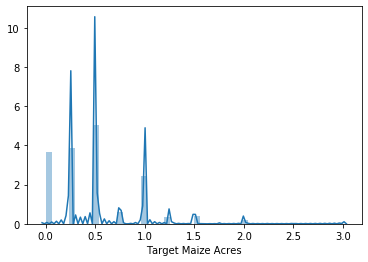

In [23]:
sns.distplot(roster_final["Target Maize Acres"]);
print("Skewness: %f" % roster_final['Target Maize Acres'].skew())
print("Kurtosis: %f" % roster_final['Target Maize Acres'].kurt())

Key Note: Even though this seems to be ripe for a regression model, the multimodal nature of the target warrants a classification approach (essentially treating each of the maize acreage types as categories. 

Because of this, we need to transform the target from continous to a categorical variable.


In [24]:
roster_final['Target Maize Acres'] = roster_final["Target Maize Acres"].astype("str")
roster_final['Target Maize Acres'] = roster_final["Target Maize Acres"].astype("category")

In [25]:
roster_final['% Repaid'].dtype

dtype('float64')

### Now focusing on the features

Getting a general sense of the # of categorical and numerical features

In [26]:
categorical_feats = roster_final.select_dtypes(include=["category"]).columns
numerical_feats = roster_final.select_dtypes(exclude=["category"]).columns

In [27]:
print('Number of Numerical features:', len(numerical_feats))
print("Number of Categorical features:", len(categorical_feats))

Number of Numerical features: 50
Number of Categorical features: 1


Getting a list of both categorical and numerical features. 

In [28]:
print(roster_final[numerical_feats].columns)
print("*"*100)
print(roster_final[categorical_feats].columns)

Index(['SiteName', 'NewMember', 'TotalEnrolledSeasons', 'TotalCredit',
       'TotalRepaid', '% Repaid', 'GlobalClientID', 'Actellic Super qty',
       'AI Ayrshire qty', 'AI Fleckvieh qty', 'AI Jersey qty',
       'Bean Intercrop acres', 'Bean Intercrop Disease Prevention acres',
       'BioLite HomeStove qty', 'Chicken Delivery qty', 'Chicken Health qty',
       'Compost Booster qty', 'Dairy Meal qty', 'Envirofit Cookstove qty',
       'Extra CAN for Maize acres', 'Farmate Sprayer 10L qty',
       'Harvest Drying Sheet qty', 'Milk Booster qty', 'PICS Bag qty',
       'Red Onions qty', 'So Sure Reusable Pads qty', 'Sorghum acres',
       'Soybean Intercrop acres', 'Storage Bag qty', 'Maize acres',
       'Green Gram Monocrop acres', 'Rice acres', 'Soil Improver (Lime) acres',
       'AI Friesian qty', 'Extra UREA for Maize acres', 'Burn Cookstove qty',
       'Managu qty', '300L Water Tank qty', '500L Water Tank qty',
       'Basic Phone qty', 'Burn Cook Stove qty',
       'Dairy Cow 

Now we need to fill NA for all numerical features. We can do this for this dataset because if it's not a number (NA), customers didn't actually order something. 

In [29]:
roster_final.update(roster_final[numerical_feats].fillna(0))

Since we'll not be needing any of the categorical features from this, no need to one hot encode.
However, for NewMember - this is boolean dtype, so best to go ahead and convert before moving forward. 

In [30]:
roster_final["NewMember"] = roster_final["NewMember"].astype(int)

Before getting started, let's make sure that target and features are clearly delineated and create a train_test split

In [34]:
from sklearn.model_selection import train_test_split

y = roster_final['Target Maize Acres']

# before compiling features, we need to ordinalencode the categorical 
#le = preprocessing.LabelEncoder()



roster_features = ['NewMember', 'TotalEnrolledSeasons', 'TotalCredit', 'TotalRepaid',
       '% Repaid', 'Actellic Super qty', 'AI Ayrshire qty', 'AI Fleckvieh qty',
       'AI Jersey qty', 'Bean Intercrop acres',
       'Bean Intercrop Disease Prevention acres', 'BioLite HomeStove qty',
       'Chicken Delivery qty', 'Chicken Health qty', 'Compost Booster qty',
       'Dairy Meal qty', 'Envirofit Cookstove qty',
       'Extra CAN for Maize acres', 'Farmate Sprayer 10L qty',
       'Harvest Drying Sheet qty', 'Milk Booster qty', 'PICS Bag qty',
       'Red Onions qty', 'So Sure Reusable Pads qty', 'Sorghum acres',
       'Soybean Intercrop acres', 'Storage Bag qty', 'Maize acres',
       'Green Gram Monocrop acres', 'Rice acres', 'Soil Improver (Lime) acres',
       'AI Friesian qty', 'Extra UREA for Maize acres', 'Burn Cookstove qty',
       'Managu qty', '300L Water Tank qty', '500L Water Tank qty',
       'Basic Phone qty', 'Burn Cook Stove qty',
       'Dairy Cow Health Package qty', 'Green Gram Intercrop acres',
       'Health Insurance qty', 'Iron Sheets qty', 'Knapsack Sprayer qty',
       'Rosecoco Beans acres', 'Smart Phone qty', 'FAW_order', 'Solar_lights']

X = roster_final[roster_features]



## Modelling 

Since part of this project is to dig further into different modeling types, in addition to providing company value, I'm going to spend an outsized amount of time looking at various models and seeing how they do. In particular I'll look at the following:
* Models built more for speed; Decision Tree, Logistic Regression
* Models built more for accuracy; Kernal SVM, Random Forest, Gradient Tree Boosting, Neural Network

First, let's bring in all the need libraries and then create a pipeline to do this efficiently. From there, we'll build out a pipeline to preprocess (scaling + PCA for dimensionality reduction, model, fit, and compare accuracy across the models. 


There are likely too many potential features here to create an effective and efficient prediction model. We're going to do PCA on the features before moving to modeling.

In [158]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.pipeline import Pipeline

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [167]:
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', tree.DecisionTreeClassifier(random_state=42))])

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=42))]) 

pipe_svc = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=2)),
                    ('clf', SVC(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=2)),
                    ('clf', RandomForestRegressor(random_state=42))])

pipe_gbc = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=2)),
                    ('clf', GradientBoostingClassifier(random_state=42))])

pipe_mlp = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=2)),
                    ('clf', MLPClassifier(random_state=42))])

#list of pipelines for easier iteration
pipelines = [pipe_dt, pipe_lr, pipe_svc, pipe_rf, pipe_gbc, pipe_mlp]

# Dictionary of pipleines for ease of reference
pipe_dict = {0: "Decision Tree", 1:"Logistic Regression", 2:"SVC", 3:"Random Forest", 4:"Gradient Boosting Classifier", 
            5:"MLP Classifier"}


Fit the pipelines

In [169]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Compare Accuracies

In [170]:
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])


Decision Tree pipeline test accuracy: 0.245
Logistic Regression pipeline test accuracy: 0.305
SVC pipeline test accuracy: 0.308
Random Forest pipeline test accuracy: -0.080
Gradient Boosting Classifier pipeline test accuracy: 0.311
MLP Classifier pipeline test accuracy: 0.309
Classifier with best accuracy: Gradient Boosting Classifier


While disapointing that we'll not be able to predict future maize sales, it's worth diving in a bit more. Does previous season maize acreaage correlate with current season acreage? If so, maybe our strategies would just hing on this. 
   

In [32]:
maize_x = roster_final["Maize acres"]

In [35]:
maize_x.corr(y)

TypeError: unsupported operand type(s) for /: 'str' and 'int'